<a href="https://colab.research.google.com/github/junhyeok0703/Wind_Power_Forecasting_Contest/blob/main/SCADA_2020_1~9_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%95%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## - 터빈모델별로 SCADA(1시간단위로 합치기)와 기상 데이터의 상관관계분석 총 9개
## - EDA 분석 끝내고 피처엔지니어링해야함..
##

In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/Colab Notebooks/BDA 공모전/분석용데이터_경주풍력_SCADA/dynamic_report_ewp02_2020_10min.xlsx'
df_2020_1 = pd.read_excel(path,sheet_name='WTG01')
df_2020_2 = pd.read_excel(path,sheet_name='WTG02')
df_2020_3 = pd.read_excel(path,sheet_name='WTG03')
df_2020_4 = pd.read_excel(path,sheet_name='WTG04')
df_2020_5 = pd.read_excel(path,sheet_name='WTG05')
df_2020_6 = pd.read_excel(path,sheet_name='WTG06')
df_2020_7 = pd.read_excel(path,sheet_name='WTG07')
df_2020_8 = pd.read_excel(path,sheet_name='WTG08')
df_2020_9 = pd.read_excel(path,sheet_name='WTG09')

In [ ]:
df_2020_1

In [ ]:
df_2020_1

,Date/Time,WTG. Name,WTG. Serial,Availability\nForced Outage Time\n[Min.],Availability\nFull Performance Time\n[Min.],Availability\nRequested Shutdown Time\n[Min.],Availability\nScheduled Maintenance Time\n[Min.],Availability\nTechnical Standby Time\n[Min.],Energy Production\nActive Energy Production\n[KWh],Generator\nAverage Winding Temp.\n[℃],...,Rotor\nBlade 2 Pos.\n[deg],Rotor\nBlade 3 Pos.\n[deg],Rotor\nMotor 1 Pos.\n[deg],Rotor\nMotor 2 Pos.\n[deg],Rotor\nMotor 3 Pos.\n[deg],Rotor\nPitch 1 Angle\n[deg],Rotor\nPitch 2 Angle\n[deg],Rotor\nPitch 3 Angle\n[deg],Rotor\nRotor Speed\n[rpm],Yaw\nYaw cable windup\n[deg]
0,2020-01-01 00:00,WTG01,U113-001,0.000000,10.000000,0.000000,0.000000,0.000000,3.798828e+02,9.298462e+01,...,1.350723e+01,1.347320e+01,13.369333,1.337027e+01,1.336993e+01,13.369333,1.337160e+01,1.336993e+01,13.455300,4.026798e+02
1,2020-01-01 00:10,WTG01,U113-001,0.000000,7.233333,0.000000,0.000000,0.000000,3.007812e+02,9.844167e+01,...,2.393460e+01,2.389100e+01,23.818967,2.381910e+01,2.381930e+01,23.818967,2.381910e+01,2.381930e+01,11.564468,4.026798e+02
2,2020-01-01 00:20,WTG01,U113-001,0.000000,0.033333,0.000000,0.000000,8.866667,0.000000e+00,8.338606e+01,...,9.008000e+01,9.000013e+01,90.000000,9.000000e+01,9.000000e+01,90.000000,9.000000e+01,9.000000e+01,-0.004660,4.026798e+02
3,2020-01-01 00:30,WTG01,U113-001,0.000000,0.033333,0.000000,0.000000,3.300000,0.000000e+00,6.773224e+01,...,9.008000e+01,9.000003e+01,90.000000,9.000000e+01,9.000000e+01,90.000000,9.000000e+01,9.000000e+01,0.004165,4.026798e+02
4,2020-01-01 00:40,WTG01,U113-001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,6.320144e+01,...,9.008000e+01,9.000003e+01,90.000000,9.000000e+01,9.000000e+01,90.000000,9.000000e+01,9.000000e+01,0.001102,4.026798e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52587,2020-12-31 23:40,WTG01,U113-001,0.000000,10.000000,0.000000,0.000000,0.000000,2.402344e+02,8.243811e+01,...,4.788000e-01,6.620000e-01,0.531733,5.318000e-01,5.316667e-01,0.531733,5.318000e-01,5.316667e-01,13.158144,5.226419e+01
52588,2020-12-31 23:50,WTG01,U113-001,0.000000,10.000000,0.000000,0.000000,0.000000,2.421875e+02,8.053288e+01,...,7.051667e-01,8.801667e-01,0.759600,7.595667e-01,7.596667e-01,0.759600,7.595667e-01,7.596667e-01,12.991564,5.226419e+01
52589,Summation,NaN,NaN,15524.966667,409326.666667,19912.933333,694.200000,9919.366667,6.589094e+06,3.604967e+06,...,1.050070e+06,1.053552e+06,748728.660207,1.049522e+06,1.051520e+06,748726.528405,1.049524e+06,1.051522e+06,452897.404202,1.301575e+07
52590,Average,NaN,NaN,0.295213,7.783504,0.378652,0.013200,0.188621,1.252941e+02,6.854983e+01,...,1.996748e+01,2.003369e+01,14.237363,1.995707e+01,1.999506e+01,14.237322,1.995710e+01,1.999509e+01,8.612018,2.474995e+02


In [ ]:
# 각 발전기에 turbine_id 추가
df_2020_1['turbine_id'] = 'WTG01'
df_2020_2['turbine_id'] = 'WTG02'
df_2020_3['turbine_id'] = 'WTG03'
df_2020_4['turbine_id'] = 'WTG04'
df_2020_5['turbine_id'] = 'WTG05'
df_2020_6['turbine_id'] = 'WTG06'
df_2020_7['turbine_id'] = 'WTG07'
df_2020_8['turbine_id'] = 'WTG08'
df_2020_9['turbine_id'] = 'WTG09'

# concat로 df을 병합 axis는 0으로 합침
df_merged = pd.concat([df_2020_1[:-3], df_2020_2[:-3], df_2020_3[:-3], df_2020_4[:-3], df_2020_5[:-3], df_2020_6[:-3], df_2020_7[:-3], df_2020_8[:-3], df_2020_9[:-3]], axis=0)


In [ ]:
df_2020_1['WTG. Serial'].unique()

array(['U113-001', nan], dtype=object)

In [ ]:
df_2020_2['WTG. Serial'].unique()

array(['U113-002', nan], dtype=object)

In [ ]:
df_2020_3['WTG. Serial'].unique()

array(['U113-003', nan], dtype=object)

In [ ]:
df_2020_4['WTG. Serial'].unique()

array(['U113-004', nan], dtype=object)

In [ ]:
pd.set_option('display.max_columns', None)
df_merged

,Date/Time,WTG. Name,WTG. Serial,Availability\nForced Outage Time\n[Min.],Availability\nFull Performance Time\n[Min.],Availability\nRequested Shutdown Time\n[Min.],Availability\nScheduled Maintenance Time\n[Min.],Availability\nTechnical Standby Time\n[Min.],Energy Production\nActive Energy Production\n[KWh],Generator\nAverage Winding Temp.\n[℃],Grid\nActive Power\n[kW],Grid\nReactive Power\n[kVAr],Hydraulic\nSystem Pressure\n[bar],Nacelle\nAir Density\n[kg/㎥],Nacelle\nNacelle Position\n[deg],Nacelle\nOutdoor Temp\n[℃],Nacelle\nWind Direction\n[deg],Nacelle\nWind Speed\n[m/s],Rotor\nBlade 1 Pos.\n[deg],Rotor\nBlade 2 Pos.\n[deg],Rotor\nBlade 3 Pos.\n[deg],Rotor\nMotor 1 Pos.\n[deg],Rotor\nMotor 2 Pos.\n[deg],Rotor\nMotor 3 Pos.\n[deg],Rotor\nPitch 1 Angle\n[deg],Rotor\nPitch 2 Angle\n[deg],Rotor\nPitch 3 Angle\n[deg],Rotor\nRotor Speed\n[rpm],Yaw\nYaw cable windup\n[deg],turbine_id
0,2020-01-01 00:00,WTG01,U113-001,0.0,10.000000,0.0,0.0,0.000000,379.882812,92.984619,2287.130850,134.908025,126.965436,1.236756,301.379850,-7.150669,288.823025,17.720697,13.441300,13.507233,13.473200,13.369333,13.370267,13.369933,13.369333,13.371600,13.369933,13.455300,402.679840,WTG01
1,2020-01-01 00:10,WTG01,U113-001,0.0,7.233333,0.0,0.0,0.000000,300.781250,98.441666,1807.046927,113.734448,126.693054,1.237363,301.379850,-7.281185,290.924050,17.592450,23.864100,23.934600,23.891000,23.818967,23.819100,23.819300,23.818967,23.819100,23.819300,11.564468,402.679840,WTG01
2,2020-01-01 00:20,WTG01,U113-001,0.0,0.033333,0.0,0.0,8.866667,0.000000,83.386063,-7.285394,10.756101,126.432226,1.237664,301.379850,-7.345770,290.473986,18.252424,89.920000,90.080000,90.000133,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,-0.004660,402.679840,WTG01
3,2020-01-01 00:30,WTG01,U113-001,0.0,0.033333,0.0,0.0,3.300000,0.000000,67.732239,-0.988690,10.290753,126.477032,1.237525,301.379850,-7.315955,288.862369,19.659755,89.920000,90.080000,90.000033,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,0.004165,402.679840,WTG01
4,2020-01-01 00:40,WTG01,U113-001,0.0,0.000000,0.0,0.0,0.000000,0.000000,63.201435,-1.009130,10.303910,126.364652,1.238306,301.379850,-7.483666,289.992840,20.319046,89.920000,90.080000,90.000033,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,0.001102,402.679840,WTG01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52584,2020-12-31 23:10,WTG09,U113-009,0.0,10.000000,0.0,0.0,0.000000,367.187500,102.567581,2206.496375,153.212252,138.279319,1.223097,328.254580,-8.096336,323.175099,10.904889,4.658167,4.747667,4.768800,4.607200,4.607467,4.607000,4.607400,4.607467,4.607000,13.491304,39.354584,WTG09
52585,2020-12-31 23:20,WTG09,U113-009,0.0,10.000000,0.0,0.0,0.000000,369.140625,101.812546,2230.649712,155.820605,138.362940,1.225993,332.009693,-8.722502,332.423910,11.423276,5.151467,5.244667,5.258900,5.114967,5.114867,5.114833,5.114900,5.114867,5.114833,13.489942,43.109943,WTG09
52586,2020-12-31 23:30,WTG09,U113-009,0.0,10.000000,0.0,0.0,0.000000,355.468750,101.634781,2141.584854,149.823711,138.073899,1.227153,337.571235,-8.972380,335.991444,10.714521,3.469200,3.538467,3.576733,3.408533,3.408767,3.409100,3.408333,3.408767,3.409100,13.466252,48.674142,WTG09
52587,2020-12-31 23:40,WTG09,U113-009,0.0,10.000000,0.0,0.0,0.000000,371.093750,100.991066,2230.533410,150.927892,138.029162,1.225763,344.656070,-8.672913,338.509301,11.752244,6.562500,6.648800,6.656367,6.514267,6.514367,6.514400,6.514267,6.514367,6.514400,13.478112,55.756073,WTG09


In [ ]:
df_merged.describe(include='all')

,Date/Time,WTG. Name,WTG. Serial,Availability\nForced Outage Time\n[Min.],Availability\nFull Performance Time\n[Min.],Availability\nRequested Shutdown Time\n[Min.],Availability\nScheduled Maintenance Time\n[Min.],Availability\nTechnical Standby Time\n[Min.],Energy Production\nActive Energy Production\n[KWh],Generator\nAverage Winding Temp.\n[℃],Grid\nActive Power\n[kW],Grid\nReactive Power\n[kVAr],Hydraulic\nSystem Pressure\n[bar],Nacelle\nAir Density\n[kg/㎥],Nacelle\nNacelle Position\n[deg],Nacelle\nOutdoor Temp\n[℃],Nacelle\nWind Direction\n[deg],Nacelle\nWind Speed\n[m/s],Rotor\nBlade 1 Pos.\n[deg],Rotor\nBlade 2 Pos.\n[deg],Rotor\nBlade 3 Pos.\n[deg],Rotor\nMotor 1 Pos.\n[deg],Rotor\nMotor 2 Pos.\n[deg],Rotor\nMotor 3 Pos.\n[deg],Rotor\nPitch 1 Angle\n[deg],Rotor\nPitch 2 Angle\n[deg],Rotor\nPitch 3 Angle\n[deg],Rotor\nRotor Speed\n[rpm],Yaw\nYaw cable windup\n[deg],turbine_id
count,473301,473301,473301,473301.000000,473301.000000,473301.000000,473301.000000,473301.000000,473301.000000,473301.000000,473301.000000,473301.000000,473301.000000,473301.000000,473301.000000,473301.000000,473301.000000,473301.000000,473301.000000,473301.000000,473301.000000,473301.000000,473301.000000,473301.000000,473301.000000,473301.000000,473301.000000,473301.000000,473301.000000,473301
unique,52589,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
top,2020-01-01 00:00,WTG01,U113-001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WTG01
freq,9,52589,52589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52589
mean,NaN,NaN,NaN,0.139314,8.140837,0.184223,0.023463,0.098432,115.059535,71.175881,871.695400,96.455243,128.839418,1.149248,205.405213,12.024518,204.886798,7.425372,15.778118,16.410946,16.418547,15.720031,16.354152,16.359460,15.720043,16.354167,16.359470,9.216049,238.785758,NaN
std,NaN,NaN,NaN,1.139027,3.823371,1.322856,0.480620,0.723649,136.995678,20.658544,840.200672,56.169473,15.995211,0.037657,106.884198,8.974804,104.650380,4.054219,34.612631,32.239707,32.232332,34.627122,32.256356,32.265081,34.627160,32.256393,32.265102,4.787959,225.482531,NaN
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.402752,-30.025931,0.000000,0.000000,1.047556,0.000000,-15.200262,0.000000,0.306949,-324.620000,-134.921300,-0.245967,-324.700000,-134.943600,0.000000,-324.700000,-134.943600,0.000000,-0.620801,-603.485100,NaN
25%,NaN,NaN,NaN,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,57.501087,90.928944,74.171866,128.548430,1.120204,103.621704,4.730197,104.571410,4.232765,0.060333,0.059500,0.077800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.696573,57.750824,NaN
50%,NaN,NaN,NaN,0.000000,10.000000,0.000000,0.000000,0.000000,42.968750,67.102554,566.788591,91.581788,131.243571,1.146932,238.927446,12.507084,237.107843,6.926286,0.154733,0.177700,0.188867,0.016133,0.017600,0.017600,0.016133,0.017600,0.017600,10.803000,216.691800,NaN
75%,NaN,NaN,NaN,0.000000,10.000000,0.000000,0.000000,0.000000,222.656250,85.795914,1618.180337,126.629015,132.634934,1.178122,299.412611,19.304893,293.478133,10.226574,8.990633,9.077733,9.103233,8.903000,9.019533,9.020267,8.903033,9.019533,9.019667,13.476823,410.512336,NaN


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 473301 entries, 0 to 52588
Data columns (total 30 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Date/Time                                         473301 non-null  object 
 1   WTG. Name                                         473301 non-null  object 
 2   WTG. Serial                                       473301 non-null  object 
 3   Availability
Forced Outage Time
[Min.]            473301 non-null  float64
 4   Availability
Full Performance Time
[Min.]         473301 non-null  float64
 5   Availability
Requested Shutdown Time
[Min.]       473301 non-null  float64
 6   Availability
Scheduled Maintenance Time
[Min.]    473301 non-null  float64
 7   Availability
Technical Standby Time
[Min.]        473301 non-null  float64
 8   Energy Production
Active Energy Production
[KWh]  473301 non-null  float64
 9   Generator


In [ ]:
# 5381.835938-(sum(df_merged[df_merged['Date/Time']=='2020-01-01 01:10']['Energy Production\nActive Energy Production\n[KWh]'])+sum(df_merged[df_merged['Date/Time']=='2020-01-01 01:20']['Energy Production\nActive Energy Production\n[KWh]'])+sum(df_merged[df_merged['Date/Time']=='2020-01-01 01:30']['Energy Production\nActive Energy Production\n[KWh]'])+sum(df_merged[df_merged['Date/Time']=='2020-01-01 01:40']['Energy Production\nActive Energy Production\n[KWh]'])+sum(df_merged[df_merged['Date/Time']=='2020-01-01 01:50']['Energy Production\nActive Energy Production\n[KWh]'])+sum(df_merged[df_merged['Date/Time']=='2020-01-01 02:00']['Energy Production\nActive Energy Production\n[KWh]']))
9767.578125-(sum(df_merged[df_merged['Date/Time']=='2020-01-01 00:10']['Energy Production\nActive Energy Production\n[KWh]'])+sum(df_merged[df_merged['Date/Time']=='2020-01-01 00:20']['Energy Production\nActive Energy Production\n[KWh]'])+sum(df_merged[df_merged['Date/Time']=='2020-01-01 00:30']['Energy Production\nActive Energy Production\n[KWh]'])+sum(df_merged[df_merged['Date/Time']=='2020-01-01 00:40']['Energy Production\nActive Energy Production\n[KWh]'])+sum(df_merged[df_merged['Date/Time']=='2020-01-01 00:50']['Energy Production\nActive Energy Production\n[KWh]']))
# 634.7656255000002
# 2337.890625

2337.890625

In [ ]:
df_merged.head(8)

,Date/Time,WTG. Name,WTG. Serial,Availability\nForced Outage Time\n[Min.],Availability\nFull Performance Time\n[Min.],Availability\nRequested Shutdown Time\n[Min.],Availability\nScheduled Maintenance Time\n[Min.],Availability\nTechnical Standby Time\n[Min.],Energy Production\nActive Energy Production\n[KWh],Generator\nAverage Winding Temp.\n[℃],Grid\nActive Power\n[kW],Grid\nReactive Power\n[kVAr],Hydraulic\nSystem Pressure\n[bar],Nacelle\nAir Density\n[kg/㎥],Nacelle\nNacelle Position\n[deg],Nacelle\nOutdoor Temp\n[℃],Nacelle\nWind Direction\n[deg],Nacelle\nWind Speed\n[m/s],Rotor\nBlade 1 Pos.\n[deg],Rotor\nBlade 2 Pos.\n[deg],Rotor\nBlade 3 Pos.\n[deg],Rotor\nMotor 1 Pos.\n[deg],Rotor\nMotor 2 Pos.\n[deg],Rotor\nMotor 3 Pos.\n[deg],Rotor\nPitch 1 Angle\n[deg],Rotor\nPitch 2 Angle\n[deg],Rotor\nPitch 3 Angle\n[deg],Rotor\nRotor Speed\n[rpm],Yaw\nYaw cable windup\n[deg],turbine_id
0,2020-01-01 00:00,WTG01,U113-001,0.0,10.000000,0.0,0.0,0.000000,379.882812,92.984619,2287.130850,134.908025,126.965436,1.236756,301.37985,-7.150669,288.823025,17.720697,13.4413,13.507233,13.473200,13.369333,13.370267,13.369933,13.369333,13.3716,13.369933,13.455300,402.67984,WTG01
1,2020-01-01 00:10,WTG01,U113-001,0.0,7.233333,0.0,0.0,0.000000,300.781250,98.441666,1807.046927,113.734448,126.693054,1.237363,301.37985,-7.281185,290.924050,17.592450,23.8641,23.934600,23.891000,23.818967,23.819100,23.819300,23.818967,23.8191,23.819300,11.564468,402.67984,WTG01
2,2020-01-01 00:20,WTG01,U113-001,0.0,0.033333,0.0,0.0,8.866667,0.000000,83.386063,-7.285394,10.756101,126.432226,1.237664,301.37985,-7.345770,290.473986,18.252424,89.9200,90.080000,90.000133,90.000000,90.000000,90.000000,90.000000,90.0000,90.000000,-0.004660,402.67984,WTG01
3,2020-01-01 00:30,WTG01,U113-001,0.0,0.033333,0.0,0.0,3.300000,0.000000,67.732239,-0.988690,10.290753,126.477032,1.237525,301.37985,-7.315955,288.862369,19.659755,89.9200,90.080000,90.000033,90.000000,90.000000,90.000000,90.000000,90.0000,90.000000,0.004165,402.67984,WTG01
4,2020-01-01 00:40,WTG01,U113-001,0.0,0.000000,0.0,0.0,0.000000,0.000000,63.201435,-1.009130,10.303910,126.364652,1.238306,301.37985,-7.483666,289.992840,20.319046,89.9200,90.080000,90.000033,90.000000,90.000000,90.000000,90.000000,90.0000,90.000000,0.001102,402.67984,WTG01
5,2020-01-01 00:50,WTG01,U113-001,0.0,0.000000,0.0,0.0,0.000000,0.000000,62.119621,-0.919327,10.322937,126.157181,1.239418,301.37985,-7.721917,292.577507,19.642364,89.9200,90.080000,90.000000,90.000000,90.000000,90.000000,90.000000,90.0000,90.000000,-0.002322,402.67984,WTG01
6,2020-01-01 01:00,WTG01,U113-001,0.0,0.000000,0.0,0.0,0.000000,0.000000,61.640320,-2.004213,11.303833,125.929306,1.240193,301.37985,-7.887889,293.462079,19.715562,89.9200,90.080133,89.996767,90.000000,90.000000,90.000000,90.000000,90.0000,90.000000,0.007092,402.67984,WTG01
7,2020-01-01 01:10,WTG01,U113-001,0.0,0.000000,0.0,0.0,0.000000,0.000000,61.292816,-1.032490,10.329637,125.697097,1.240779,301.37985,-8.013177,290.928184,19.814962,89.9512,90.080033,89.974867,90.000000,90.000000,90.000000,90.000000,90.0000,90.000000,0.024690,402.67984,WTG01


In [ ]:
print(df_merged.head())
print(df_merged.tail())

          Date/Time WTG. Name WTG. Serial  \
0  2020-01-01 00:00     WTG01    U113-001   
1  2020-01-01 00:10     WTG01    U113-001   
2  2020-01-01 00:20     WTG01    U113-001   
3  2020-01-01 00:30     WTG01    U113-001   
4  2020-01-01 00:40     WTG01    U113-001   

   Availability\nForced Outage Time\n[Min.]  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   Availability\nFull Performance Time\n[Min.]  \
0                                    10.000000   
1                                     7.233333   
2                                     0.033333   
3                                     0.033333   
4                                     0.000000   

   Availability\nRequested Shutdown Time\n[Min.]  \
0                                            0.0   
1                                        

In [ ]:
df_merged['WTG. Serial'].unique()
df_merged['turbine_id'].unique()
df = df_merged.copy()

In [ ]:
df["Date/Time"] = pd.to_datetime(df["Date/Time"])

In [ ]:
df.dtypes

,0
Date/Time,datetime64[ns]
WTG. Name,object
WTG. Serial,object
Availability\nForced Outage Time\n[Min.],float64
Availability\nFull Performance Time\n[Min.],float64
Availability\nRequested Shutdown Time\n[Min.],float64
Availability\nScheduled Maintenance Time\n[Min.],float64
Availability\nTechnical Standby Time\n[Min.],float64
Energy Production\nActive Energy Production\n[KWh],float64
Generator\nAverage Winding Temp.\n[℃],float64


In [ ]:
df.head(3)

,Date/Time,WTG. Name,WTG. Serial,Availability\nForced Outage Time\n[Min.],Availability\nFull Performance Time\n[Min.],Availability\nRequested Shutdown Time\n[Min.],Availability\nScheduled Maintenance Time\n[Min.],Availability\nTechnical Standby Time\n[Min.],Energy Production\nActive Energy Production\n[KWh],Generator\nAverage Winding Temp.\n[℃],Grid\nActive Power\n[kW],Grid\nReactive Power\n[kVAr],Hydraulic\nSystem Pressure\n[bar],Nacelle\nAir Density\n[kg/㎥],Nacelle\nNacelle Position\n[deg],Nacelle\nOutdoor Temp\n[℃],Nacelle\nWind Direction\n[deg],Nacelle\nWind Speed\n[m/s],Rotor\nBlade 1 Pos.\n[deg],Rotor\nBlade 2 Pos.\n[deg],Rotor\nBlade 3 Pos.\n[deg],Rotor\nMotor 1 Pos.\n[deg],Rotor\nMotor 2 Pos.\n[deg],Rotor\nMotor 3 Pos.\n[deg],Rotor\nPitch 1 Angle\n[deg],Rotor\nPitch 2 Angle\n[deg],Rotor\nPitch 3 Angle\n[deg],Rotor\nRotor Speed\n[rpm],Yaw\nYaw cable windup\n[deg],turbine_id
0,2020-01-01 00:00:00,WTG01,U113-001,0.0,10.000000,0.0,0.0,0.000000,379.882812,92.984619,2287.130850,134.908025,126.965436,1.236756,301.37985,-7.150669,288.823025,17.720697,13.4413,13.507233,13.473200,13.369333,13.370267,13.369933,13.369333,13.3716,13.369933,13.455300,402.67984,WTG01
1,2020-01-01 00:10:00,WTG01,U113-001,0.0,7.233333,0.0,0.0,0.000000,300.781250,98.441666,1807.046927,113.734448,126.693054,1.237363,301.37985,-7.281185,290.924050,17.592450,23.8641,23.934600,23.891000,23.818967,23.819100,23.819300,23.818967,23.8191,23.819300,11.564468,402.67984,WTG01
2,2020-01-01 00:20:00,WTG01,U113-001,0.0,0.033333,0.0,0.0,8.866667,0.000000,83.386063,-7.285394,10.756101,126.432226,1.237664,301.37985,-7.345770,290.473986,18.252424,89.9200,90.080000,90.000133,90.000000,90.000000,90.000000,90.000000,90.0000,90.000000,-0.004660,402.67984,WTG01


In [ ]:
df

,Date/Time,WTG. Name,WTG. Serial,Availability\nForced Outage Time\n[Min.],Availability\nFull Performance Time\n[Min.],Availability\nRequested Shutdown Time\n[Min.],Availability\nScheduled Maintenance Time\n[Min.],Availability\nTechnical Standby Time\n[Min.],Energy Production\nActive Energy Production\n[KWh],Generator\nAverage Winding Temp.\n[℃],Grid\nActive Power\n[kW],Grid\nReactive Power\n[kVAr],Hydraulic\nSystem Pressure\n[bar],Nacelle\nAir Density\n[kg/㎥],Nacelle\nNacelle Position\n[deg],Nacelle\nOutdoor Temp\n[℃],Nacelle\nWind Direction\n[deg],Nacelle\nWind Speed\n[m/s],Rotor\nBlade 1 Pos.\n[deg],Rotor\nBlade 2 Pos.\n[deg],Rotor\nBlade 3 Pos.\n[deg],Rotor\nMotor 1 Pos.\n[deg],Rotor\nMotor 2 Pos.\n[deg],Rotor\nMotor 3 Pos.\n[deg],Rotor\nPitch 1 Angle\n[deg],Rotor\nPitch 2 Angle\n[deg],Rotor\nPitch 3 Angle\n[deg],Rotor\nRotor Speed\n[rpm],Yaw\nYaw cable windup\n[deg],turbine_id
0,2020-01-01 00:00:00,WTG01,U113-001,0.0,10.000000,0.0,0.0,0.000000,379.882812,92.984619,2287.130850,134.908025,126.965436,1.236756,301.379850,-7.150669,288.823025,17.720697,13.441300,13.507233,13.473200,13.369333,13.370267,13.369933,13.369333,13.371600,13.369933,13.455300,402.679840,WTG01
1,2020-01-01 00:10:00,WTG01,U113-001,0.0,7.233333,0.0,0.0,0.000000,300.781250,98.441666,1807.046927,113.734448,126.693054,1.237363,301.379850,-7.281185,290.924050,17.592450,23.864100,23.934600,23.891000,23.818967,23.819100,23.819300,23.818967,23.819100,23.819300,11.564468,402.679840,WTG01
2,2020-01-01 00:20:00,WTG01,U113-001,0.0,0.033333,0.0,0.0,8.866667,0.000000,83.386063,-7.285394,10.756101,126.432226,1.237664,301.379850,-7.345770,290.473986,18.252424,89.920000,90.080000,90.000133,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,-0.004660,402.679840,WTG01
3,2020-01-01 00:30:00,WTG01,U113-001,0.0,0.033333,0.0,0.0,3.300000,0.000000,67.732239,-0.988690,10.290753,126.477032,1.237525,301.379850,-7.315955,288.862369,19.659755,89.920000,90.080000,90.000033,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,0.004165,402.679840,WTG01
4,2020-01-01 00:40:00,WTG01,U113-001,0.0,0.000000,0.0,0.0,0.000000,0.000000,63.201435,-1.009130,10.303910,126.364652,1.238306,301.379850,-7.483666,289.992840,20.319046,89.920000,90.080000,90.000033,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,0.001102,402.679840,WTG01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52584,2020-12-31 23:10:00,WTG09,U113-009,0.0,10.000000,0.0,0.0,0.000000,367.187500,102.567581,2206.496375,153.212252,138.279319,1.223097,328.254580,-8.096336,323.175099,10.904889,4.658167,4.747667,4.768800,4.607200,4.607467,4.607000,4.607400,4.607467,4.607000,13.491304,39.354584,WTG09
52585,2020-12-31 23:20:00,WTG09,U113-009,0.0,10.000000,0.0,0.0,0.000000,369.140625,101.812546,2230.649712,155.820605,138.362940,1.225993,332.009693,-8.722502,332.423910,11.423276,5.151467,5.244667,5.258900,5.114967,5.114867,5.114833,5.114900,5.114867,5.114833,13.489942,43.109943,WTG09
52586,2020-12-31 23:30:00,WTG09,U113-009,0.0,10.000000,0.0,0.0,0.000000,355.468750,101.634781,2141.584854,149.823711,138.073899,1.227153,337.571235,-8.972380,335.991444,10.714521,3.469200,3.538467,3.576733,3.408533,3.408767,3.409100,3.408333,3.408767,3.409100,13.466252,48.674142,WTG09
52587,2020-12-31 23:40:00,WTG09,U113-009,0.0,10.000000,0.0,0.0,0.000000,371.093750,100.991066,2230.533410,150.927892,138.029162,1.225763,344.656070,-8.672913,338.509301,11.752244,6.562500,6.648800,6.656367,6.514267,6.514367,6.514400,6.514267,6.514367,6.514400,13.478112,55.756073,WTG09


In [ ]:
df['Date/Time'] = pd.to_datetime(df['Date/Time']) + pd.Timedelta(hours=-1)

df_resampled = df.resample('1H', on='Date/Time').agg({
    'Energy Production\nActive Energy Production\n[KWh]': 'sum',  # 발전량
    'Nacelle\nWind Speed\n[m/s]': 'mean',  # 풍속
    'Nacelle\nOutdoor Temp\n[℃]': 'mean',  # 외부 온도
    'Grid\nActive Power\n[kW]': 'mean',  # 유효 전력
    'Rotor\nRotor Speed\n[rpm]': 'mean',  # 로터 속도
    'Generator\nAverage Winding Temp.\n[℃]': 'mean'  # 발전기 온도
})


df_resampled.head(5)


<ipython-input-34-a6946c3c686c>:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample('1H', on='Date/Time').agg({


,Energy Production\nActive Energy Production\n[KWh],Nacelle\nWind Speed\n[m/s],Nacelle\nOutdoor Temp\n[℃],Grid\nActive Power\n[kW],Rotor\nRotor Speed\n[rpm],Generator\nAverage Winding Temp.\n[℃]
Date/Time,,,,,,
2020-01-01 01:00:00,8950.195312,18.258983,-7.604829,1084.926237,6.659856,81.459044
2020-01-01 02:00:00,5366.210938,19.205344,-8.103196,597.473768,3.704401,72.341603
2020-01-01 03:00:00,3012.695312,19.727332,-8.142132,335.187409,2.109306,62.314321
2020-01-01 04:00:00,4385.742188,19.447271,-7.584433,488.100085,3.143863,61.847568
2020-01-01 05:00:00,4491.210938,19.277365,-6.997742,499.489745,3.342782,59.828947


In [ ]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2020-01-01 01:00:00 to 2021-01-01 00:00:00
Freq: h
Data columns (total 6 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Energy Production
Active Energy Production
[KWh]  8784 non-null   float64
 1   Nacelle
Wind Speed
[m/s]                          8767 non-null   float64
 2   Nacelle
Outdoor Temp
[℃]                          8767 non-null   float64
 3   Grid
Active Power
[kW]                            8767 non-null   float64
 4   Rotor
Rotor Speed
[rpm]                           8767 non-null   float64
 5   Generator
Average Winding Temp.
[℃]               8767 non-null   float64
dtypes: float64(6)
memory usage: 480.4 KB


In [ ]:
# 다른거 결측치가 있다.
df_resampled.isnull().sum()

,0
Energy Production\nActive Energy Production\n[KWh],0
Nacelle\nWind Speed\n[m/s],17
Nacelle\nOutdoor Temp\n[℃],17
Grid\nActive Power\n[kW],17
Rotor\nRotor Speed\n[rpm],17
Generator\nAverage Winding Temp.\n[℃],17


In [ ]:
df_resampled[df_resampled.isnull().any(axis=1)]
df_resampled.index

DatetimeIndex(['2020-01-01 01:00:00', '2020-01-01 02:00:00',
               '2020-01-01 03:00:00', '2020-01-01 04:00:00',
               '2020-01-01 05:00:00', '2020-01-01 06:00:00',
               '2020-01-01 07:00:00', '2020-01-01 08:00:00',
               '2020-01-01 09:00:00', '2020-01-01 10:00:00',
               ...
               '2020-12-31 15:00:00', '2020-12-31 16:00:00',
               '2020-12-31 17:00:00', '2020-12-31 18:00:00',
               '2020-12-31 19:00:00', '2020-12-31 20:00:00',
               '2020-12-31 21:00:00', '2020-12-31 22:00:00',
               '2020-12-31 23:00:00', '2021-01-01 00:00:00'],
              dtype='datetime64[ns]', name='Date/Time', length=8784, freq='h')

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/BDA 공모전/train_y.csv'
train_y = pd.read_csv(path)
train_y.dtypes

,0
plant_name,object
end_datetime,object
period_hours,int64
energy_kwh,float64


In [ ]:
train_y['end_datetime']=pd.to_datetime(train_y['end_datetime'])
train_y.head(3)

,plant_name,end_datetime,period_hours,energy_kwh
0,경주풍력,2020-01-01 01:00:00+09:00,1,9767.578125
1,경주풍력,2020-01-01 02:00:00+09:00,1,5381.835938
2,경주풍력,2020-01-01 03:00:00+09:00,1,3021.484375


<Axes: >

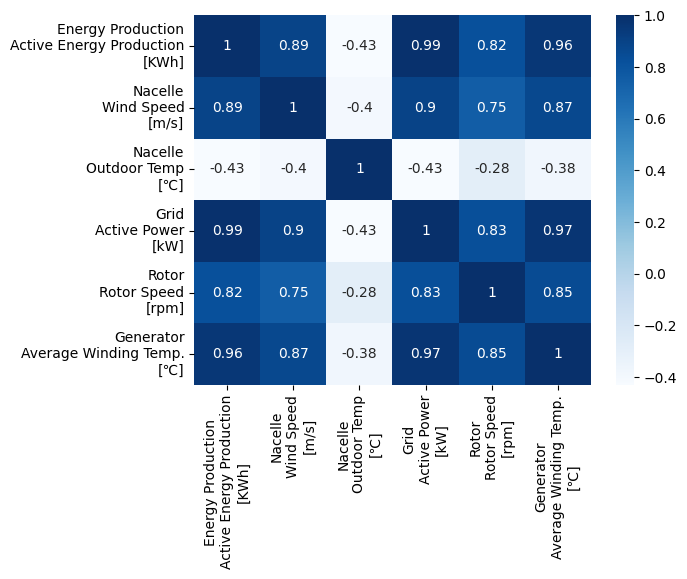

In [ ]:
import seaborn as sns
df_corr= df_resampled.corr()
sns.heatmap(df_corr, annot=True, cmap='Blues')

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/BDA 공모전/train_ldaps_gyeongju.pkl'
train_ldaps_pkl = pd.read_pickle(path)
train_ldaps_pkl.dtypes

,0
elevation,float64
land_cover,float64
surf_rough,float64
frictional_vmax_50m,float64
frictional_vmin_50m,float64
pressure,float64
relative_humid,float64
specific_humid,float64
temp_air,float64
storm_u_5m,float64


In [ ]:
train_ldaps_pkl[:50]

,elevation,land_cover,surf_rough,frictional_vmax_50m,frictional_vmin_50m,pressure,relative_humid,specific_humid,temp_air,storm_u_5m,storm_v_5m,wind_u_10m,wind_v_10m,turbine_id
dt,,,,,,,,,,,,,,
2020-01-02 00:00:00+09:00,387.640625,1.0,0.286911,10.428498,10.059580,97974.593750,91.796478,0.002686,269.467560,0.021201,-0.375756,7.353266,-2.640615,WTG01
2020-01-02 01:00:00+09:00,387.640625,1.0,0.286911,10.472921,10.044404,97970.132812,91.729774,0.002686,269.430847,0.020706,-0.371947,7.578446,-2.414076,WTG01
2020-01-02 02:00:00+09:00,387.640625,1.0,0.286911,10.682985,10.478634,97951.546875,92.788666,0.002686,269.374390,0.020556,-0.354397,7.654554,-2.259913,WTG01
2020-01-02 03:00:00+09:00,387.640625,1.0,0.286911,10.676681,10.090029,97908.968750,92.494576,0.002686,269.352112,0.021635,-0.328609,7.275844,-2.280371,WTG01
2020-01-02 04:00:00+09:00,387.640625,1.0,0.286911,10.079557,9.672620,97858.398438,88.986443,0.002686,269.413269,0.024231,-0.265124,6.911751,-1.920128,WTG01
2020-01-02 05:00:00+09:00,387.640625,1.0,0.286911,10.172257,9.720346,97827.554688,86.816383,0.002686,269.531189,0.025048,-0.284825,7.253250,-2.388391,WTG01
2020-01-02 06:00:00+09:00,387.640625,1.0,0.286911,10.916547,10.211677,97829.273438,87.227058,0.002686,269.684204,0.029298,-0.358250,7.790693,-2.815061,WTG01
2020-01-02 07:00:00+09:00,387.640625,1.0,0.286911,11.196836,10.919600,97872.109375,87.197525,0.002686,269.807678,0.020383,-0.433627,8.031821,-3.002549,WTG01
2020-01-02 08:00:00+09:00,387.640625,1.0,0.286911,11.195824,11.106686,97937.992188,86.390419,0.002686,270.375610,0.020331,-0.470265,8.045771,-2.946987,WTG01


In [ ]:
train_ldaps_pkl.head(10)

,elevation,land_cover,surf_rough,frictional_vmax_50m,frictional_vmin_50m,pressure,relative_humid,specific_humid,temp_air,storm_u_5m,storm_v_5m,wind_u_10m,wind_v_10m,turbine_id
dt,,,,,,,,,,,,,,
2020-01-02 00:00:00+09:00,387.640625,1.0,0.286911,10.428498,10.059580,97974.593750,91.796478,0.002686,269.467560,0.021201,-0.375756,7.353266,-2.640615,WTG01
2020-01-02 01:00:00+09:00,387.640625,1.0,0.286911,10.472921,10.044404,97970.132812,91.729774,0.002686,269.430847,0.020706,-0.371947,7.578446,-2.414076,WTG01
2020-01-02 02:00:00+09:00,387.640625,1.0,0.286911,10.682985,10.478634,97951.546875,92.788666,0.002686,269.374390,0.020556,-0.354397,7.654554,-2.259913,WTG01
2020-01-02 03:00:00+09:00,387.640625,1.0,0.286911,10.676681,10.090029,97908.968750,92.494576,0.002686,269.352112,0.021635,-0.328609,7.275844,-2.280371,WTG01
2020-01-02 04:00:00+09:00,387.640625,1.0,0.286911,10.079557,9.672620,97858.398438,88.986443,0.002686,269.413269,0.024231,-0.265124,6.911751,-1.920128,WTG01
2020-01-02 05:00:00+09:00,387.640625,1.0,0.286911,10.172257,9.720346,97827.554688,86.816383,0.002686,269.531189,0.025048,-0.284825,7.253250,-2.388391,WTG01
2020-01-02 06:00:00+09:00,387.640625,1.0,0.286911,10.916547,10.211677,97829.273438,87.227058,0.002686,269.684204,0.029298,-0.358250,7.790693,-2.815061,WTG01
2020-01-02 07:00:00+09:00,387.640625,1.0,0.286911,11.196836,10.919600,97872.109375,87.197525,0.002686,269.807678,0.020383,-0.433627,8.031821,-3.002549,WTG01
2020-01-02 08:00:00+09:00,387.640625,1.0,0.286911,11.195824,11.106686,97937.992188,86.390419,0.002686,270.375610,0.020331,-0.470265,8.045771,-2.946987,WTG01


In [ ]:
# 풍속 계산
train_ldaps_pkl['wind_speed_10m'] = (train_ldaps_pkl['wind_u_10m']**2 + train_ldaps_pkl['wind_v_10m']**2)**0.5


In [ ]:
train_ldaps_pkl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 235818 entries, 2020-01-02 00:00:00+09:00 to 2022-12-31 23:00:00+09:00
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   elevation            235818 non-null  float64
 1   land_cover           235818 non-null  float64
 2   surf_rough           235818 non-null  float64
 3   frictional_vmax_50m  235818 non-null  float64
 4   frictional_vmin_50m  235818 non-null  float64
 5   pressure             235818 non-null  float64
 6   relative_humid       235818 non-null  float64
 7   specific_humid       235818 non-null  float64
 8   temp_air             235818 non-null  float64
 9   storm_u_5m           235818 non-null  float64
 10  storm_v_5m           235818 non-null  float64
 11  wind_u_10m           235818 non-null  float64
 12  wind_v_10m           235818 non-null  float64
 13  turbine_id           235818 non-null  object 
 14  wind_speed_10m       2

In [ ]:
len(train_ldaps_pkl[train_ldaps_pkl['wind_speed_10m']>=20])

13

In [ ]:
# 1. 경주 풍력 데이터만 필터링
train_y_gyeongju = train_y[train_y['plant_name'] == '경주풍력']

# 2. 2020년도 데이터만 필터링
train_y_gyeongju_2020 = train_y_gyeongju[train_y_gyeongju['end_datetime'].dt.year == 2020]

# 3. 필터링된 데이터를 70% 학습용, 30% 테스트용으로 분할
from sklearn.model_selection import train_test_split
y_train, y_test = train_test_split(train_y_gyeongju_2020, test_size=0.3, random_state=42)


print(f'학습 데이터 크기: {len(y_train)}')
print(f'테스트 데이터 크기: {len(y_test)}')


학습 데이터 크기: 6148
테스트 데이터 크기: 2635


In [ ]:
df_real_resampled = df_resampled.iloc[23:]

In [ ]:
train_ldaps_pkl.head(10)

,elevation,land_cover,surf_rough,frictional_vmax_50m,frictional_vmin_50m,pressure,relative_humid,specific_humid,temp_air,storm_u_5m,storm_v_5m,wind_u_10m,wind_v_10m,turbine_id,wind_speed_10m
dt,,,,,,,,,,,,,,,
2020-01-02 00:00:00+09:00,387.640625,1.0,0.286911,10.428498,10.059580,97974.593750,91.796478,0.002686,269.467560,0.021201,-0.375756,7.353266,-2.640615,WTG01,7.813025
2020-01-02 01:00:00+09:00,387.640625,1.0,0.286911,10.472921,10.044404,97970.132812,91.729774,0.002686,269.430847,0.020706,-0.371947,7.578446,-2.414076,WTG01,7.953654
2020-01-02 02:00:00+09:00,387.640625,1.0,0.286911,10.682985,10.478634,97951.546875,92.788666,0.002686,269.374390,0.020556,-0.354397,7.654554,-2.259913,WTG01,7.981191
2020-01-02 03:00:00+09:00,387.640625,1.0,0.286911,10.676681,10.090029,97908.968750,92.494576,0.002686,269.352112,0.021635,-0.328609,7.275844,-2.280371,WTG01,7.624827
2020-01-02 04:00:00+09:00,387.640625,1.0,0.286911,10.079557,9.672620,97858.398438,88.986443,0.002686,269.413269,0.024231,-0.265124,6.911751,-1.920128,WTG01,7.173506
2020-01-02 05:00:00+09:00,387.640625,1.0,0.286911,10.172257,9.720346,97827.554688,86.816383,0.002686,269.531189,0.025048,-0.284825,7.253250,-2.388391,WTG01,7.636364
2020-01-02 06:00:00+09:00,387.640625,1.0,0.286911,10.916547,10.211677,97829.273438,87.227058,0.002686,269.684204,0.029298,-0.358250,7.790693,-2.815061,WTG01,8.283687
2020-01-02 07:00:00+09:00,387.640625,1.0,0.286911,11.196836,10.919600,97872.109375,87.197525,0.002686,269.807678,0.020383,-0.433627,8.031821,-3.002549,WTG01,8.574698
2020-01-02 08:00:00+09:00,387.640625,1.0,0.286911,11.195824,11.106686,97937.992188,86.390419,0.002686,270.375610,0.020331,-0.470265,8.045771,-2.946987,WTG01,8.568498


In [ ]:
train_ldaps_real = train_ldaps_pkl[:8761]

In [ ]:
len(df_real_resampled)

8761

In [ ]:
df_real_resampled['Energy Production\nActive Energy Production\n[KWh]']

,Energy Production\nActive Energy Production\n[KWh]
Date/Time,
2020-01-02 00:00:00,15450.195312
2020-01-02 01:00:00,13818.359375
2020-01-02 02:00:00,13813.476562
2020-01-02 03:00:00,13814.453125
2020-01-02 04:00:00,13811.523438
...,...
2020-12-31 20:00:00,11730.468750
2020-12-31 21:00:00,10804.687500
2020-12-31 22:00:00,11679.687500


In [ ]:
import numpy as np
df_real_resampled['Energy Production\nActive Energy Production\n[KWh]'].values
# np.concatenate(train_ldaps_pkl.values,df_real_resampled['Energy Production\nActive Energy Production\n[KWh]'].values,axis=1)

array([15450.1953125, 13818.359375 , 13813.4765625, ..., 11679.6875   ,
       12265.625    , 12884.765625 ])

In [ ]:
pd.concat([train_ldaps_pkl,df_real_resampled['Energy Production\nActive Energy Production\n[KWh]'].values],axis=0)

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [ ]:
df_real_resampled.reset_index(inplace=True)

In [ ]:
df_real_resampled

,Date/Time,Energy Production\nActive Energy Production\n[KWh],Nacelle\nWind Speed\n[m/s],Nacelle\nOutdoor Temp\n[℃],Grid\nActive Power\n[kW],Rotor\nRotor Speed\n[rpm],Generator\nAverage Winding Temp.\n[℃]
0,2020-01-02 00:00:00,15450.195312,15.723250,-2.366382,1982.268406,11.616426,101.989002
1,2020-01-02 01:00:00,13818.359375,15.976705,-2.600359,1958.366143,11.448389,99.450042
2,2020-01-02 02:00:00,13813.476562,14.984798,-2.717209,1990.045542,11.635069,101.306578
3,2020-01-02 03:00:00,13814.453125,14.668058,-2.718726,1965.081424,11.487849,99.066283
4,2020-01-02 04:00:00,13811.523438,14.673787,-2.680691,2059.012657,12.024835,101.167479
...,...,...,...,...,...,...,...
8756,2020-12-31 20:00:00,11730.468750,11.308350,-4.760205,1773.550868,13.106672,80.028885
8757,2020-12-31 21:00:00,10804.687500,10.583620,-4.515519,1663.985147,12.254185,87.967829
8758,2020-12-31 22:00:00,11679.687500,9.909774,-4.885311,1730.314666,12.953765,87.676282
8759,2020-12-31 23:00:00,12265.625000,10.172235,-5.676970,1835.892593,13.445074,90.584061


In [ ]:
train_ldaps_pkl.reset_index(inplace=True)
train_ldaps_pkl[:100]

,dt,elevation,land_cover,surf_rough,frictional_vmax_50m,frictional_vmin_50m,pressure,relative_humid,specific_humid,temp_air,storm_u_5m,storm_v_5m,wind_u_10m,wind_v_10m,turbine_id
0,2020-01-02 00:00:00+09:00,387.640625,1.0,0.286911,10.428498,10.059580,97974.593750,91.796478,0.002686,269.467560,0.021201,-0.375756,7.353266,-2.640615,WTG01
1,2020-01-02 01:00:00+09:00,387.640625,1.0,0.286911,10.472921,10.044404,97970.132812,91.729774,0.002686,269.430847,0.020706,-0.371947,7.578446,-2.414076,WTG01
2,2020-01-02 02:00:00+09:00,387.640625,1.0,0.286911,10.682985,10.478634,97951.546875,92.788666,0.002686,269.374390,0.020556,-0.354397,7.654554,-2.259913,WTG01
3,2020-01-02 03:00:00+09:00,387.640625,1.0,0.286911,10.676681,10.090029,97908.968750,92.494576,0.002686,269.352112,0.021635,-0.328609,7.275844,-2.280371,WTG01
4,2020-01-02 04:00:00+09:00,387.640625,1.0,0.286911,10.079557,9.672620,97858.398438,88.986443,0.002686,269.413269,0.024231,-0.265124,6.911751,-1.920128,WTG01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020-01-02 23:00:00+09:00,292.593750,1.0,0.307016,6.596226,5.973623,98880.554688,89.006020,0.003418,272.452881,0.025409,-0.525477,4.178290,-4.672113,WTG04
96,2020-01-02 00:00:00+09:00,292.593750,1.0,0.307016,5.330964,4.846201,99190.343750,89.085052,0.002686,269.935577,0.022453,-0.339440,3.043085,-3.657705,WTG05
97,2020-01-02 01:00:00+09:00,292.593750,1.0,0.307016,4.974020,4.649507,99190.007812,88.783485,0.002686,269.905701,0.021683,-0.320159,3.064164,-3.377577,WTG05
98,2020-01-02 02:00:00+09:00,292.593750,1.0,0.307016,5.187014,4.908932,99173.671875,90.005463,0.002686,269.889282,0.021746,-0.305874,3.201307,-3.167872,WTG05


In [ ]:
train_ldaps_pkl

,elevation,land_cover,surf_rough,frictional_vmax_50m,frictional_vmin_50m,pressure,relative_humid,specific_humid,temp_air,storm_u_5m,storm_v_5m,wind_u_10m,wind_v_10m,turbine_id,wind_speed_10m,Energy Production\nActive
dt,,,,,,,,,,,,,,,,
2020-01-02 00:00:00+09:00,387.640625,1.0,0.286911,10.428498,10.059580,97974.593750,91.796478,0.002686,269.467560,0.021201,-0.375756,7.353266,-2.640615,WTG01,7.813025,NaN
2020-01-02 01:00:00+09:00,387.640625,1.0,0.286911,10.472921,10.044404,97970.132812,91.729774,0.002686,269.430847,0.020706,-0.371947,7.578446,-2.414076,WTG01,7.953654,NaN
2020-01-02 02:00:00+09:00,387.640625,1.0,0.286911,10.682985,10.478634,97951.546875,92.788666,0.002686,269.374390,0.020556,-0.354397,7.654554,-2.259913,WTG01,7.981191,NaN
2020-01-02 03:00:00+09:00,387.640625,1.0,0.286911,10.676681,10.090029,97908.968750,92.494576,0.002686,269.352112,0.021635,-0.328609,7.275844,-2.280371,WTG01,7.624827,NaN
2020-01-02 04:00:00+09:00,387.640625,1.0,0.286911,10.079557,9.672620,97858.398438,88.986443,0.002686,269.413269,0.024231,-0.265124,6.911751,-1.920128,WTG01,7.173506,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00+09:00,291.109375,1.0,0.297867,8.637415,7.864836,99167.562500,74.509628,0.002686,271.486450,0.055735,-0.458066,5.616918,-3.090602,WTG09,6.411052,NaN
2022-12-31 20:00:00+09:00,291.109375,1.0,0.297867,8.557701,8.090375,99152.601562,76.035263,0.002686,271.668732,0.062759,-0.452708,5.667057,-3.909548,WTG09,6.884773,NaN
2022-12-31 21:00:00+09:00,291.109375,1.0,0.297867,8.151713,7.254983,99152.273438,79.691605,0.002686,270.929230,0.067177,-0.463064,4.844544,-3.716026,WTG09,6.105609,NaN
